In [1]:
import json
 
f = open('5may2022-graph.json') # LND `describegraph` output taken on May 5, 2022
data = json.load(f)
f.close()

print("# nodes = " + str(len(data['nodes'])))
print("# edges = " + str(len(data['edges'])))
 
PK = [x['pub_key'] for x in data['nodes']]
PKtoV = {}
for i in range(len(PK)):
    PKtoV[PK[i]] = i;
    
n = len(data['nodes'])
E = {};
E_w = {};
for v in range(n):
    E[v] = [];
    E_w[v] = [];
for e in data['edges']:
    u = PKtoV[e['node1_pub']]
    v = PKtoV[e['node2_pub']]
    C = int(e['capacity'])
    E[u].append([v, 1]) # unweighted graph
    E[v].append([u, 1])
    E_w[u].append([v, C]) # weighted graph
    E_w[v].append([u, C])


# nodes = 17813
# edges = 84927


In [2]:
# greedy algorithm #1
# returns list partition, s.t. partition[v] = 0/1 depending on the side of v in the partition
def COMPUTE_IMBALANCED_MAX_CUT(n, E, k):
    if (n<k):
        return [];
    partition = [0] * n # initially all nodes are on the 0 side
    cut_capacity = [0]
    edges_count = [0]
    for i in range(k):
        print("greedy step " + str(i+1) + "/" + str(k))
        best_vertex = -1;
        best_increase = 0;
        for j in range(n):
            if (partition[j] == 0): # consider only nodes still on the 0 side
                C_cut = 0; # compute total capacity incident to node j in the cut
                C_notcut = 0; # compute total capacity incident to node j NOT in the cut
                a = 0
                b = 0
                for e in E[j]:
                    if (partition[e[0]] == 0):
                        C_notcut += e[1];
                        b += 1
                    else:
                        C_cut += e[1];
                        a += 1
                        
                new_increase = C_notcut - C_cut;
                if ((best_vertex < 0) or (new_increase > best_increase)):
                    tmp = b - a
                    best_vertex = j;
                    best_increase = new_increase;
        partition[best_vertex] = 1; # make best greedy move
        cut_capacity.append(cut_capacity[-1] + best_increase)
        edges_count.append(edges_count[-1] + tmp)
    return partition

# returns the capacities of all greedy max cuts for all values of k
# i.e. cut_capacity[i] is the capacity of the greedy max cut with i nodes on one side
# note that cut_capacity[i] for all i>n/2 is ommitted since capacity[i] <= capacity[n-i] in this case
def COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E):
    cut_capacity = [0]
    edges_count = [0]
    partition = [0] * n # initially all nodes are on the 0 side
    for i in range(int(n/2)): # consider only cuts of up to n/2 nodes on one side
        if (int(i*100/(n/2))>int((i-1)*100/(n/2))):
            print("greedy step " + str(i+1) + "/" + str(n/2))
        best_vertex = -1;
        best_increase = 0;
        for j in range(n):
            if (partition[j] == 0): # consider only nodes still on the 0 side
                C_cut = 0; # compute total capacity incident to node j in the cut
                C_notcut = 0; # compute total capacity incident to node j NOT in the cut
                a = 0
                b = 0
                for e in E[j]:
                    if (partition[e[0]] == 0):
                        C_notcut += e[1];
                        b += 1
                    else:
                        C_cut += e[1];
                        a += 1

                new_increase = C_notcut - C_cut;
                if ((best_vertex < 0) or (new_increase > best_increase)):
                    tmp = b - a
                    best_vertex = j;
                    best_increase = new_increase;
        partition[best_vertex] = 1; # make best greedy move
        cut_capacity.append(cut_capacity[-1] + best_increase)
        edges_count.append(edges_count[-1] + tmp)
    return cut_capacity, edges_count

In [3]:
# Code to produce the JSON file to analyze the computed max-cut, not needed for experiments

#import requests
#import time

#P = COMPUTE_IMBALANCED_MAX_CUT(n, E_w, 30)
# nodes_in_weighted_max_cut = []

# for i in range(len(P)):
#     if(P[i] == 1):
#         res = requests.get(f"https://1ml.com/node/{PK[i]}/json")
#         nodes_in_weighted_max_cut.append(res.json())
#         print(f"{len(nodes_in_weighted_max_cut)} done")
#         time.sleep(1)


# with open('nodes-in-weighted-max-cut.json', 'w') as outfile:
#     json.dump(nodes_in_weighted_max_cut, outfile)

# Computing LMC and LWMC
C, edges_count = COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E)
C_w, edges_count_w = COMPUTE_ALL_GREEDY_IMBALANCED_MAX_CUTS(n, E_w)

greedy step 91/8906.5
greedy step 180/8906.5
greedy step 269/8906.5
greedy step 358/8906.5
greedy step 447/8906.5
greedy step 536/8906.5
greedy step 625/8906.5
greedy step 714/8906.5
greedy step 803/8906.5
greedy step 892/8906.5
greedy step 981/8906.5
greedy step 1070/8906.5
greedy step 1159/8906.5
greedy step 1248/8906.5
greedy step 1337/8906.5
greedy step 1427/8906.5
greedy step 1516/8906.5
greedy step 1605/8906.5
greedy step 1694/8906.5
greedy step 1783/8906.5
greedy step 1872/8906.5
greedy step 1961/8906.5
greedy step 2050/8906.5
greedy step 2139/8906.5
greedy step 2228/8906.5
greedy step 2317/8906.5
greedy step 2406/8906.5
greedy step 2495/8906.5
greedy step 2584/8906.5
greedy step 2673/8906.5
greedy step 2763/8906.5
greedy step 2852/8906.5
greedy step 2941/8906.5
greedy step 3030/8906.5
greedy step 3119/8906.5
greedy step 3208/8906.5
greedy step 3297/8906.5
greedy step 3386/8906.5
greedy step 3475/8906.5
greedy step 3564/8906.5
greedy step 3653/8906.5
greedy step 3742/8906.5
gree

Weighted Max-Cut:

max cut capacity = 246436727385
max cut edges = 58531
k = 10
capacity = 119989207382 / 246436727385 = 48.69%
edges = 10911 / 63251 = 17.25%
k = 20
capacity = 151342104519 / 246436727385 = 61.41%
edges = 17353 / 63251 = 27.44%
k = 30
capacity = 168512912253 / 246436727385 = 68.38%
edges = 20084 / 63251 = 31.75%
k = 40
capacity = 179606715202 / 246436727385 = 72.88%
edges = 22731 / 63251 = 35.94%
k = 50
capacity = 188172635323 / 246436727385 = 76.36%
edges = 26424 / 63251 = 41.78%
k = 60
capacity = 194742560327 / 246436727385 = 79.02%
edges = 28926 / 63251 = 45.73%
k = 70
capacity = 200095978518 / 246436727385 = 81.20%
edges = 31363 / 63251 = 49.58%
k = 80
capacity = 204384540343 / 246436727385 = 82.94%
edges = 32759 / 63251 = 51.79%
k = 90
capacity = 207903674963 / 246436727385 = 84.36%
edges = 34734 / 63251 = 54.91%
k = 100
capacity = 210769582507 / 246436727385 = 85.53%
edges = 35447 / 63251 = 56.04%
k = 110
capacity = 213275201396 / 246436727385 = 86.54%
edges = 36

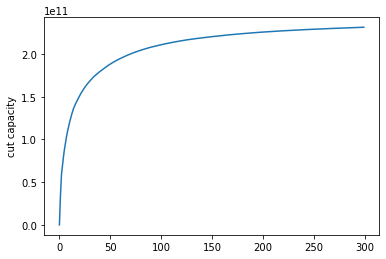

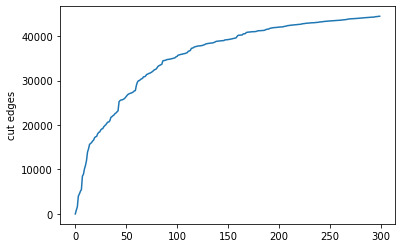

Unweighted Max-Cut:

max cut edges = 63251
k = 10
edges = 15725 / 63251 = 24.86%
k = 20
edges = 22666 / 63251 = 35.84%
k = 30
edges = 26729 / 63251 = 42.26%
k = 40
edges = 29987 / 63251 = 47.41%
k = 50
edges = 32749 / 63251 = 51.78%
k = 60
edges = 35163 / 63251 = 55.59%
k = 70
edges = 37351 / 63251 = 59.05%
k = 80
edges = 39224 / 63251 = 62.01%
k = 90
edges = 40735 / 63251 = 64.40%
k = 100
edges = 42062 / 63251 = 66.50%
k = 110
edges = 43226 / 63251 = 68.34%
k = 120
edges = 44254 / 63251 = 69.97%
k = 130
edges = 45125 / 63251 = 71.34%
k = 140
edges = 45884 / 63251 = 72.54%
k = 150
edges = 46574 / 63251 = 73.63%
k = 160
edges = 47203 / 63251 = 74.63%
k = 170
edges = 47786 / 63251 = 75.55%
k = 180
edges = 48335 / 63251 = 76.42%
k = 190
edges = 48855 / 63251 = 77.24%
k = 200
edges = 49341 / 63251 = 78.01%
k = 210
edges = 49798 / 63251 = 78.73%
k = 220
edges = 50225 / 63251 = 79.41%
k = 230
edges = 50637 / 63251 = 80.06%
k = 240
edges = 51022 / 63251 = 80.67%
k = 250
edges = 51378 / 63251 

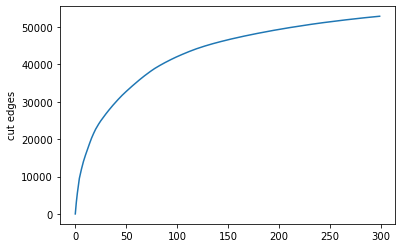

In [6]:
import matplotlib.pyplot as plt
import json
import math

print("Weighted Max-Cut:\n")

print("max cut capacity = " + str(max(C_w)))
print("max cut edges = " + str(max(edges_count_w)))

weighted_output_json_array = []

for k in range(10, 301, 10):
    print("k = " + str(k))
    print(f'capacity = {C_w[k]:d} / {max(C_w):d} = {100*C_w[k]/max(C_w):2.2f}%')
    print(f'edges = {edges_count_w[k]:d} / {max(C):d} = {100*edges_count_w[k]/max(C):2.2f}%')
    output = {}
    output["k"] = k
    output["edges"] = edges_count_w[k]
    output["capacity"] = C_w[k] / (math.pow(10, 8))
    weighted_output_json_array.append(output)

with open('weighted-imbalanced-max-cut-output.json', 'w') as outfile:
    json.dump(weighted_output_json_array, outfile)

plt.plot(C_w[0:k])
plt.ylabel('cut capacity')
plt.show()

plt.plot(edges_count_w[0:k])
plt.ylabel('cut edges')
plt.show()

print("Unweighted Max-Cut:\n")

print("max cut edges = " + str(max(edges_count)))

for k in range(10, 301, 10):
    print("k = " + str(k))
    print(f'edges = {edges_count[k]:d} / {max(edges_count):d} = {100*edges_count[k]/max(edges_count):2.2f}%')

plt.plot(edges_count[0:k])
plt.ylabel('cut edges')
plt.show()

